In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import json
from pprint import pprint

# Resource File (CSV)
five_cities = pd.read_csv("output_data/Top_497.csv")
five_cities.head()

,Unnamed: 0,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,all_reviews_count,Cuisines
0,0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,224,"French, European"
1,1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,454,Modern Australian
2,2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,329,Japanese
3,3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,196,"Italian, Japanese"
4,4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,190,"Japanese, Ramen"


In [103]:
#Reorganising columns so Cuisine is at the end of the dataframe - dropping unnamed.
new_df = five_cities[['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines"]]
new_df

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,Rating Text,Votes,Cuisines
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,Excellent,589,"French, European"
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,Excellent,1366,Modern Australian
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,Excellent,1235,Japanese
3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,Excellent,452,"Italian, Japanese"
4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,Excellent,486,"Japanese, Ramen"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,16586992,Jolley's Boathouse,City Centre,"1 Jolleys Lane, City Centre, Adelaide",Adelaide,-34.917011,138.600296,4,120,4.2,Very Good,233,"Seafood, Modern Australian"
493,16588907,The Gallery,"Waymouth Street, City Centre","30 Waymouth Street, Adelaide, City Centre, Ade...",Adelaide,-34.925872,138.598311,4,100,4.2,Very Good,166,"Tapas, Bar Food"
494,16587014,Lenzerheide Restaurant,Kingswood,"146 Belair Road, Kingswood, Adelaide",Adelaide,-34.972047,138.609192,4,120,4.2,Very Good,233,European
495,16589555,Sukhumvit Soi 38,City Centre,"54 Pulteney Street, Adelaide",Adelaide,-34.923131,138.605479,3,90,4.2,Very Good,145,Thai


In [121]:
#Separating Cuisines data by comma and placing the data into new columns
df = pd.concat([new_df, new_df['Cuisines'].str.split(', ', expand=True)], axis=1)
df.columns = ['Restaurant_id',"Name", "Locality", "Address", "City", "Latitude", "Longitude", "Price Range", 
                      "Average Cost for two", "User Rating", "Rating Text", "Votes", "Cuisines", "Cuisine_1","Cuisine_2","Cuisine_3","Cuisine_4","Cuisine_5","Cuisine_6","Cuisine_7","Cuisine_8"]
df

,Restaurant_id,Name,Locality,Address,City,Latitude,Longitude,Price Range,Average Cost for two,User Rating,...,Votes,Cuisines,Cuisine_1,Cuisine_2,Cuisine_3,Cuisine_4,Cuisine_5,Cuisine_6,Cuisine_7,Cuisine_8
0,15547004,Restaurant Hubert,CBD,"15 Bligh Street, CBD, Sydney",Sydney,-33.865348,151.210624,4,150,4.9,...,589,"French, European",French,European,None,None,None,None,None,None
1,16558798,Quay,Circular Quay,"Upper Level, Overseas Passenger Terminal 5 Hic...",Sydney,-33.858029,151.209970,4,500,4.9,...,1366,Modern Australian,Modern Australian,None,None,None,None,None,None,None
2,16559171,Tetsuya's,CBD,"529 Kent Street, CBD, Sydney",Sydney,-33.875143,151.204932,4,440,4.9,...,1235,Japanese,Japanese,None,None,None,None,None,None,None
3,16569454,LuMi Bar & Dining,Pyrmont,"56 Pirrama Road, \tPyrmont, Pyrmont, Sydney",Sydney,-33.867137,151.197517,4,190,4.9,...,452,"Italian, Japanese",Italian,Japanese,None,None,None,None,None,None
4,15545439,Manpuku,Chatswood,"226 Victoria Avenue, Chatswood, Sydney",Sydney,-33.794417,151.189542,2,40,4.9,...,486,"Japanese, Ramen",Japanese,Ramen,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,16586992,Jolley's Boathouse,City Centre,"1 Jolleys Lane, City Centre, Adelaide",Adelaide,-34.917011,138.600296,4,120,4.2,...,233,"Seafood, Modern Australian",Seafood,Modern Australian,None,None,None,None,None,None
493,16588907,The Gallery,"Waymouth Street, City Centre","30 Waymouth Street, Adelaide, City Centre, Ade...",Adelaide,-34.925872,138.598311,4,100,4.2,...,166,"Tapas, Bar Food",Tapas,Bar Food,None,None,None,None,None,None
494,16587014,Lenzerheide Restaurant,Kingswood,"146 Belair Road, Kingswood, Adelaide",Adelaide,-34.972047,138.609192,4,120,4.2,...,233,European,European,None,None,None,None,None,None,None
495,16589555,Sukhumvit Soi 38,City Centre,"54 Pulteney Street, Adelaide",Adelaide,-34.923131,138.605479,3,90,4.2,...,145,Thai,Thai,None,None,None,None,None,None,None


In [130]:
#Placing Cuisine_1 the main cuisine in a Dataframe to allow grouping
cuisines1 = df["Cuisine_1"].value_counts()
cuisines1

Japanese                   82
Asian                      65
Italian                    59
Modern Australian          41
European/Mediterranean     34
Other                      30
American/Burger            24
Indian                     21
Vietnamese                 17
Spanish/Tapas              17
French                     16
Middle Eastern             16
Chinese                    15
Coffee and Tea/Desserts    10
Korean                      8
Cafe Food                   5
BBQ                         4
Mexican                     3
Latin American              3
Lebanese                    3
Fish and Chips              2
Cantonese                   2
Sandwich                    2
Turkish                     2
Healthy Food                2
Contemporary                2
Indonesian                  2
Ice Cream                   1
Argentine                   1
Vegan                       1
Crepes                      1
British                     1
Portuguese                  1
Pub Food  

In [164]:
# Combining similar cuisines together
df = df.replace({"Sushi": "Japanese", "Japanese BBQ": "Japanese", "Ramen" : "Japanese",
                                    "Pizza": "Italian", "Australian": "Modern Australian", 
                                    "European" : "European/Mediterranean", "Mediterranean" : "European/Mediterranean", 
                                    "Greek" : "European/Mediterranean", "Spanish" : "Spanish/Tapas", "Tapas" : "Spanish/Tapas",
                 "Burger" : "American/Burger", "American": "American/Burger",  
                 "Korean BBQ":"Korean", "Asian Fusion": "Asian", "Modern European":"European/Mediterranean", "Fast Food":"American/Burger", 
               "Coffee and Tea": "Coffee and Tea/Desserts", "Desserts":"Coffee and Tea/Desserts"
         })

cuisines2 = df["Cuisine_1"].value_counts()
cuisines2

Japanese                   82
Asian                      65
Italian                    59
Modern Australian          41
European/Mediterranean     34
Other                      30
American/Burger            24
Indian                     21
Vietnamese                 17
Spanish/Tapas              17
French                     16
Middle Eastern             16
Chinese                    15
Coffee and Tea/Desserts    10
Korean                      8
Cafe Food                   5
BBQ                         4
Mexican                     3
Latin American              3
Lebanese                    3
Fish and Chips              2
Cantonese                   2
Sandwich                    2
Turkish                     2
Healthy Food                2
Contemporary                2
Indonesian                  2
Ice Cream                   1
Argentine                   1
Vegan                       1
Crepes                      1
British                     1
Portuguese                  1
Pub Food  

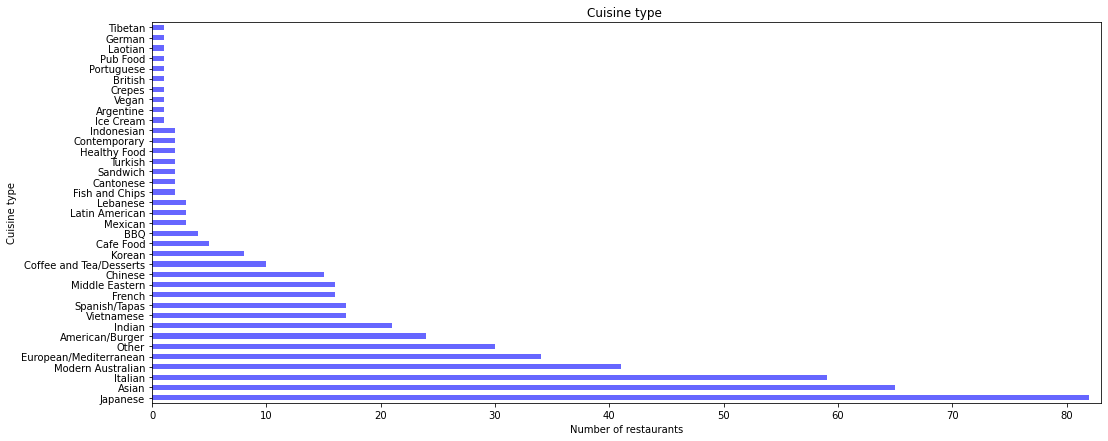

<Figure size 432x288 with 0 Axes>

In [134]:
cuisines.plot(kind="barh", facecolor="blue", alpha=0.6, figsize=(17,7), legend = None)
# Set textual properties
plt.title("Cuisine type ")
plt.ylabel("Cuisine type")
plt.xlabel("Number of restaurants")
plt.ylim(-0.5,len(cuisines)-0.5)
plt.xlim(0,max(cuisines["Cuisine_1"])+1)
#Save image
plt.savefig('images/Cuisine type - Top 100 restaurants.png')
# Show plot
plt.show()
plt.tight_layout()

In [155]:
#Keep the top ten cuisines we are interested in:
final_df = df.loc[(df["Cuisine_1"] == "Japanese") |
                                  (df["Cuisine_1"] == "Asian") |
                                  (df["Cuisine_1"] == "Italian")|
                                   (df["Cuisine_1"] == "Modern Australian") |
                                   (df["Cuisine_1"] == "European/Mediterranean") |
                  (df["Cuisine_1"] == "American/Burget") |
                  (df["Cuisine_1"] == "Indian") |
                  (df["Cuisine_1"] == "Vietnamese") |
                  (df["Cuisine_1"] == "Spanish/Tapas") |
                  (df["Cuisine_1"] == "French") 
                                  ]
final_df["Cuisine_1"]

0                      French
1           Modern Australian
2                    Japanese
3                     Italian
4                    Japanese
                ...          
489                  Japanese
493             Spanish/Tapas
494    European/Mediterranean
495                     Asian
496                     Asian
Name: Cuisine_1, Length: 352, dtype: object

In [156]:
city_group = final_df.groupby("City")
cuisine_city = pd.DataFrame(city_group["Cuisine_1"].value_counts())
cuisine_city.columns = ["Count"]
cuisine_city

Count
City      Cuisine_1                    
Adelaide  Asian                      19
          Italian                    14
          European/Mediterranean     11
          Modern Australian           9
          Indian                      8
          Vietnamese                  5
          Japanese                    4
          Spanish/Tapas               3
          French                      1
Brisbane  Japanese                   14
          Italian                    12
          Asian                      11
          Indian                      7
          Modern Australian           7
          Vietnamese                  6
          European/Mediterranean      5
          French                      5
          Spanish/Tapas               3
Melbourne Japanese                   18
          Asian                      16
          Italian                    11
          Modern Australian           8
          European/Mediterranean      7
          Spanish/Tapas               4
          French                      3
          Vietnamese                  2
          Indian                      1
Perth     Japanese                   21
          Italian                    11
          European/Mediterranean      8
          Asian                       7
          Modern Australian           6
          Spanish/Tapas               6
          Indian                      4
          French                      2
          Vietnamese                  2
Sydney    Japanese                   25
          Asian                      12
          Italian                    11
          Modern Australian          11
          French                      5
          European/Mediterranean      3
          Vietnamese                  2
          Indian                      1
          Spanish/Tapas               1

In [162]:
cuisine_group = final_df.groupby("Cuisine_1")
cities_per_cuisines = pd.DataFrame(cuisine_group["City"].value_counts())
cities_per_cuisines.columns = ["Count"]
cities_per_cuisines

Count
Cuisine_1              City            
Asian                  Adelaide      19
                       Melbourne     16
                       Sydney        12
                       Brisbane      11
                       Perth          7
European/Mediterranean Adelaide      11
                       Perth          8
                       Melbourne      7
                       Brisbane       5
                       Sydney         3
French                 Brisbane       5
                       Sydney         5
                       Melbourne      3
                       Perth          2
                       Adelaide       1
Indian                 Adelaide       8
                       Brisbane       7
                       Perth          4
                       Melbourne      1
                       Sydney         1
Italian                Adelaide      14
                       Brisbane      12
                       Melbourne     11
                       Perth         11
                       Sydney        11
Japanese               Sydney        25
                       Perth         21
                       Melbourne     18
                       Brisbane      14
                       Adelaide       4
Modern Australian      Sydney        11
                       Adelaide       9
                       Melbourne      8
                       Brisbane       7
                       Perth          6
Spanish/Tapas          Perth          6
                       Melbourne      4
                       Adelaide       3
                       Brisbane       3
                       Sydney         1
Vietnamese             Brisbane       6
                       Adelaide       5
                       Melbourne      2
                       Perth          2
                       Sydney         2